Projeto 3 - Samara e Tainara

Git Hub: www.github.com/tainarasm




Professor, resolvemos trocar de data set! Agora estamos com um data set que também trata de acidentes de avião, no entanto no mundo todo e não somente no Brasil. Estamos com algumas ideias:

1 - Fazer um agrupamento dos acidentes por região do mundo, de modo a observar a presença de algum padrão
2 - Desenvolver um classificador que ajuda a prever qual é chance de ocorrer um acidente quando um avião encontra-se em determinada situação (teríamos como referência a coluna "Summary")
3 - Estudar a influência da localização em que o acidente ocorre no número de mortes (seria uma regressão, acreditamos, no entanto, somente conseguimos transformar a "localização" em duas variáveis contínuas (Latitude e Longitude), não é possível fazer o mesmo com o número de mortes - isso inviabilizaria o projeto?)

Poderia nos dar um feedback sobre o que é mais interessante desenvolver?

Temos uma noção de como fazer um classificador ou uma regressão! Somente não temos de como fazer um cluster!

Muito obrigada!

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\taina\Ci-ncia-dos-Dados\Projeto Final


In [204]:
tempo = pd.read_excel('meteorologia.xlsx')
#tempo2 = pd.read_excel('franca.xlsx')

#meteorologia = tempo.set_index('Data').join(tempo2.set_index('Data'), how='inner', lsuffix='_MirSantana', rsuffix='_Franca')

tempo = tempo.groupby(['Estacao','Data'])
tempo = tempo.last()
tempo = tempo.dropna()

#meteorologia

tempo.head()

Hora  Precipitacao  TempMaxima  TempMinima  Insolacao  \
Estacao Data                                                                
83781   2010-01-01  1200           3.4        24.3        18.9        0.0   
        2010-01-02  1200          10.2        29.6        19.1        0.6   
        2010-01-03  1200          30.4        31.4        20.5        2.2   
        2010-01-04  1200           0.0        33.0        20.1        6.8   
        2010-01-05  1200          14.3        31.9        19.5        3.7   

                    Umidade Relativa Media  Velocidade do Vento Media  
Estacao Data                                                           
83781   2010-01-01                   90.50                        1.8  
        2010-01-02                   88.75                        1.2  
        2010-01-03                   80.75                  3133333.0  
        2010-01-04                   83.25                  2766667.0  
        2010-01-05                   83.00                  1133333.0

In [197]:
X = []
X_umidade = []
Y = []

"""for i in range(len(meteorologia['TempMaxima_MirSantana'])-1):
    lista_X.append(meteorologia['TempMaxima_MirSantana'][i])
    if len(lista_X)==len(meteorologia['TempMaxima_MirSantana'])-1:
        for i in range(len(meteorologia['TempMaxima_Franca'])-1):
            lista_X.append(meteorologia['TempMaxima_Franca'][i])
            

for l in range(1,len(meteorologia['Precipitacao_MirSantana'])):
    lista_Y.append(meteorologia['Precipitacao_MirSantana'][l])
    if len(lista_Y)==len(meteorologia['Precipitacao_MirSantana'])-1:
        for j in range(len(meteorologia['Precipitacao_Franca'])-1):
            lista_Y.append(meteorologia['Precipitacao_Franca'][j])"""
            
            

for i in range(len(tempo['TempMaxima'])-1):
    X.append(tempo['TempMaxima'][i])
    X_umidade.append(tempo['Umidade Relativa Media'][i])
        
    
for l in range(1,len(tempo['Precipitacao'])):
    Y.append(tempo['Precipitacao'][l])
    
    
    
X_test = X[0:1200]
X_umidade_test = X_umidade[0:1200]
y_test = Y[0:1200]

lista_X = X[1200:]
lista_X_umidade = X_umidade[1200:0]
lista_Y = Y[1200:]
    

#plt.scatter([lista_X,X_umidade],lista_Y)


In [208]:
import numpy as np
import statsmodels.api as sm


lista_X = np.asarray(lista_X)
lista_Y = np.asarray(lista_Y)

Y = tempo['Precipitacao']
X = tempo[["TempMinima","TempMaxima","Umidade Relativa Media"]]
#Y = lista_Y
#X = [[lista_X,lista_X_umidade]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Precipitacao   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     99.58
Date:                Sun, 12 Nov 2017   Prob (F-statistic):           3.51e-61
Time:                        20:22:19   Log-Likelihood:                -10534.
No. Observations:                2746   AIC:                         2.108e+04
Df Residuals:                    2742   BIC:                         2.110e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -25.7410      2.823     -9.118      0.000     -31.276     -20.206
TempMinima                 0.4435      0.104      4.259      0.000       0.239       0.648
TempMaxima                 0.0647      0.090      0.720      0.472      -0.112       0.241
Umidade Relativa Media     0.2921      0.024     11.998      0.000       0.244       0.340
==============================================================================
Omnibus:                     2302.079   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60777.373
Skew:                           3.930   Prob(JB):                         0.00
Kurtosis:                      24.666   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[ 4.57712522]


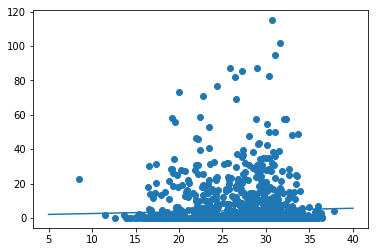

In [209]:
from sklearn.linear_model import LinearRegression

lista_X = np.asarray(lista_X)
lista_Y = np.asarray(lista_Y)

genius_regression = LinearRegression()
genius_regression.fit(lista_X.reshape(-1,1),lista_Y)

xfit = np.linspace(5, 40, 1000)
yfit = genius_regression.predict(xfit[:, np.newaxis])

print(genius_regression.predict(30))

plt.scatter(lista_X, lista_Y)
plt.plot(xfit, yfit)




In [183]:
print("Model slope:    ", genius_regression.coef_[0])
print("Model intercept:", genius_regression.intercept_)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


list(genius_regression.predict(X_test.reshape(-1,1))[0:5])

Model slope:     0.101827580516
Model intercept: 1.5222978017


[3.9967080082540654,
 4.5363941849911633,
 4.7196838299207435,
 4.8826079587470375,
 4.7705976201789602]

In [186]:
#Erro RSS

print(((y_test - genius_regression.predict(X_test.reshape(-1,1)))**2).sum())

#Erro MSE
print(np.mean((genius_regression.predict(X_test.reshape(-1,1)) - y_test) **2))

181830.516233
151.525430194


In [89]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(lista_X[:, None])

array([[  2.43000000e+01,   5.90490000e+02,   1.43489070e+04],
       [  2.96000000e+01,   8.76160000e+02,   2.59343360e+04],
       [  3.14000000e+01,   9.85960000e+02,   3.09591440e+04],
       ..., 
       [  2.70000000e+01,   7.29000000e+02,   1.96830000e+04],
       [  2.30000000e+01,   5.29000000e+02,   1.21670000e+04],
       [  2.32000000e+01,   5.38240000e+02,   1.24871680e+04]])

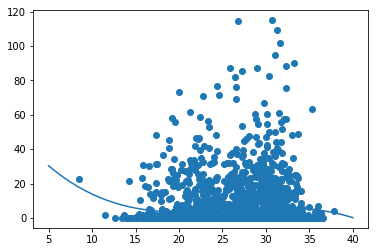

In [125]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

poly_model.fit(lista_X[:, np.newaxis], lista_Y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(lista_X, lista_Y)
plt.plot(xfit, yfit)

(-3, 120)

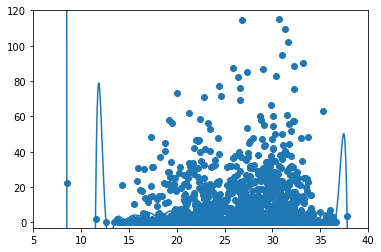

In [142]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(30),
                            LinearRegression())
gauss_model.fit(lista_X[:, np.newaxis], lista_Y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(lista_X, lista_Y)
plt.plot(xfit, yfit)
plt.xlim(5, 40)
plt.ylim(-3, 120)

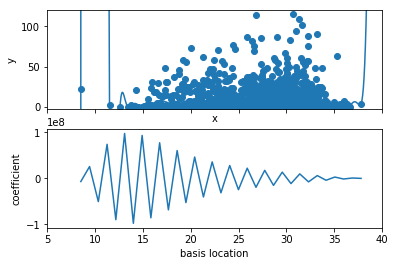

In [143]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(lista_X[:, np.newaxis], lista_Y)
    ax[0].scatter(lista_X, lista_Y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-3, 120))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(5, 40))
    
model = make_pipeline(GaussianFeatures(33), LinearRegression())
basis_plot(model)